Importando librerias:

In [1]:
import sklearn
from sklearn import datasets ,model_selection,linear_model,preprocessing
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
df = pd.read_csv('diabetes.csv')
df3 = pd.read_csv('diabetes.csv')


<h1>1)Acerca del Dataset:<h1>

    -Indicar tipo de archivo.
    -tamaño del dataset (método "shape").
    -enumerar las variables ("columns_tolist").
    -Indicar cuál es la variable dependiente objetivo o target y cuáles las variables independientes o predictoras.

In [2]:
# indicar el tipo de archivo
print("Typo de archivo: ")
print(df.dtypes)


Typo de archivo: 
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [3]:
# indicar el tamano del dataframe
print("Tamaño del dataframe: ")
print(df.shape)


Tamaño del dataframe: 
(768, 9)


In [4]:
# enumerar las variables del dataframe
print("Variables del dataframe: ")
print(df.columns.to_list())


Variables del dataframe: 
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


In [5]:
# indicar cual es la variable objetivo
print("Variable objetivo: ")
print(df.columns[-1])


Variable objetivo: 
Outcome


In [6]:
# indicar  cuales son las variables predictoras
print("Variables predictoras: ")
print(df.columns[:-1].to_list())

Variables predictoras: 
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


<h1>2)Analisis Exploratorio de los Datos </h1>

    -Presentar los estadísticos (método "describe") 
    -histogramas (método "hist") 
    -diagramas Boxplot por cada variable predictora. 
    -¿Puede visualizar datos anómalos?

In [7]:
# presentar los estadisticos descriptivos del dataframe y que no se corte la tabla
print("Estadisticos descriptivos del dataframe: ")
df.describe()


Estadisticos descriptivos del dataframe: 


Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

Histograma: 


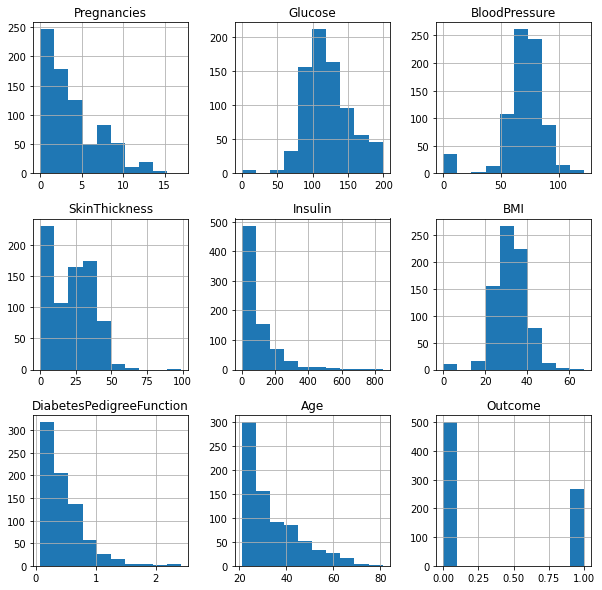

In [8]:
# histograma
print("Histograma: ")
df.hist(figsize=(10, 10))
plt.show()


Diagrama boxplot: 


<AxesSubplot:>

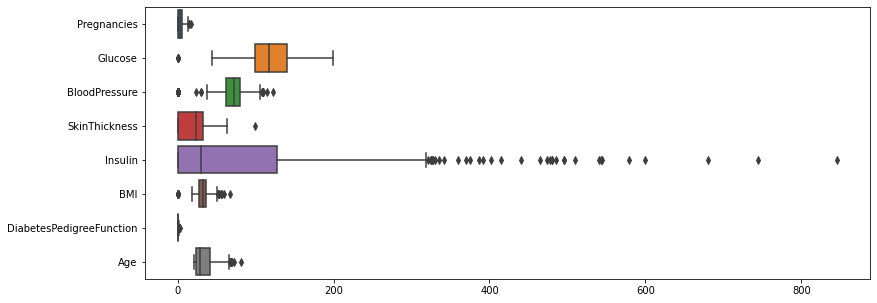

In [9]:
# diagrama boxplot de cada variable predictora
print("Diagrama boxplot: ")
df2= df.iloc[:,:-1]
plt.figure(figsize=(13, 5))
sns.boxplot(data=df2,orient='h')


<h3>¿puede visualizar datos anomalos?</h3>
<p>Si los diagramas boxplot se puede ver como hay datos anomalos en cada variable anomala que se representan como circulos en la grafica. como puede ser que hay un dato que en la presión sanguiña que da como valor 0, cosa que no es posible, pues si tenes presión 0 el paciente estaria muerto.</p>

<h1>3) Data Wrangling(limpieza y transformación):</h1>

<h3>Primero me fijo si hay registros nulos y duplicados</h3>

In [10]:
print(df.isna().any())
print(df.duplicated().any())


Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool
False


<h3>Elimino de cada variable los elementos anomalos</h3>

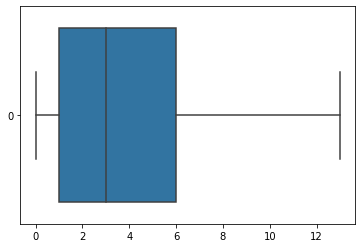

In [11]:
q1 = df['Pregnancies'].quantile(0.25)
q3 = df['Pregnancies'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['Pregnancies'] > upper_limit]
df = df[(df['Pregnancies'] > lower_limit) & (df['Pregnancies'] < upper_limit)]
sns.boxplot(data=df['Pregnancies'], orient='h')
plt.show()


In [12]:
q1 = df['Glucose'].quantile(0.25)
q3 = df['Glucose'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['Glucose'] > upper_limit]
df = df[(df['Glucose']>lower_limit) & (df['Glucose']<upper_limit)]
sns.boxplot(data=df['Glucose'],orient='h')
plt.show()


<AxesSubplot:>

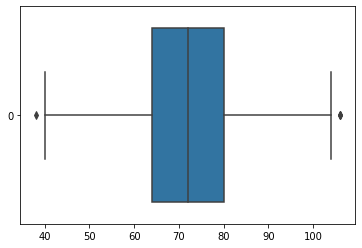

In [13]:
q1 = df['BloodPressure'].quantile(0.25)
q3 = df['BloodPressure'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['BloodPressure'] > upper_limit]
df = df[(df['BloodPressure']>lower_limit) & (df['BloodPressure']<upper_limit)]
sns.boxplot(data=df['BloodPressure'], orient='h')

In [14]:
q1 = df['SkinThickness'].quantile(0.25)
q3 = df['SkinThickness'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['SkinThickness'] > upper_limit]
df = df[(df['SkinThickness']>lower_limit) & (df['SkinThickness']<upper_limit)]
sns.boxplot(data=df['SkinThickness'], orient='h')
plt.show()

<AxesSubplot:>

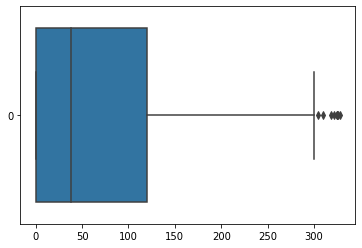

In [15]:
q1 = df['Insulin'].quantile(0.25)
q3 = df['Insulin'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['Insulin'] > upper_limit]
df = df[(df['Insulin']>lower_limit) & (df['Insulin']<upper_limit)]
sns.boxplot(data=df['Insulin'], orient='h')
# reemplazar los valores mayor a 350 con el valor 60



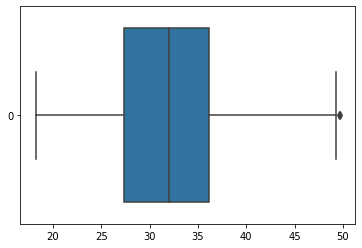

In [16]:
q1 = df['BMI'].quantile(0.25)
q3 = df['BMI'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['BMI'] > upper_limit]
df = df[(df['BMI']>lower_limit) & (df['BMI']<upper_limit)]
sns.boxplot(data=df['BMI'], orient='h')
plt.show()

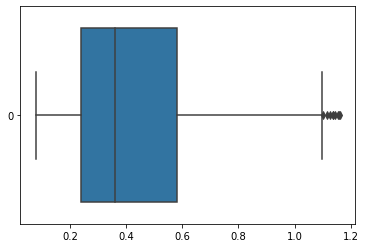

In [17]:
q1 = df['DiabetesPedigreeFunction'].quantile(0.25)
q3 = df['DiabetesPedigreeFunction'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['DiabetesPedigreeFunction'] > upper_limit]
df = df[(df['DiabetesPedigreeFunction']>lower_limit) & (df['DiabetesPedigreeFunction']<upper_limit)]
sns.boxplot(data=df['DiabetesPedigreeFunction'], orient='h')
plt.show()

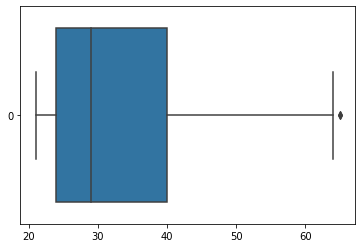

In [18]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1
lower_limit = q1 - (1.5 * iqr)
upper_limit = q3 + (1.5 * iqr)
df[df['Age'] > upper_limit]
df = df[(df['Age']>lower_limit) & (df['Age']<upper_limit)]
sns.boxplot(data=df['Age'], orient='h')
plt.show()

<AxesSubplot:>

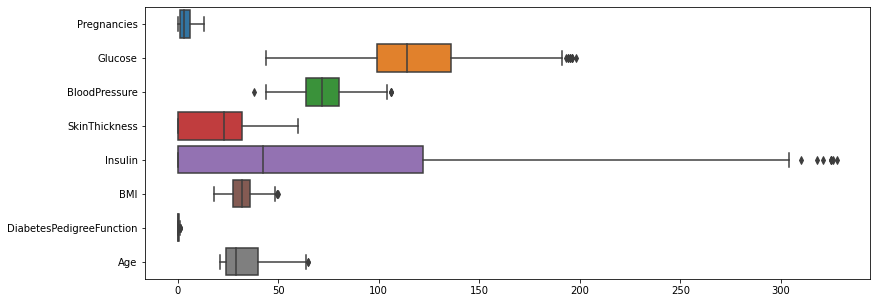

In [19]:
plt.figure(figsize=(13, 5))
sns.boxplot(data=df.iloc[:,:-1], orient='h')

In [20]:
# tamaño del dataframe
print("Tamaño del dataframe: ")
print(df.shape)

Tamaño del dataframe: 
(636, 9)


<h3>4)Reduccion de Dimensionalidad:</h3>

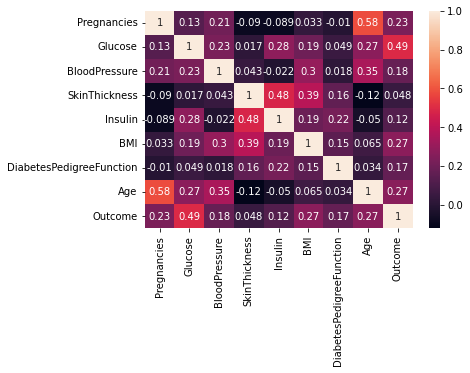

<Figure size 648x432 with 0 Axes>

In [21]:
matriz_corr = df.corr()
sns.heatmap(matriz_corr, annot=True)
fig = plt.figure(figsize=(9, 6))
plt.show()

In [22]:
x = df.iloc[:,0:df.shape[1]-1].values
y = df.iloc[:,df.shape[1]-1].values
x_std = StandardScaler().fit_transform(x)
matriz_covarianza = np.cov(x_std.T)
auto_valores, auto_vectores = np.linalg.eig(matriz_covarianza)
auto_pares = [(np.abs(auto_valores[i]), auto_vectores[:,i]) for i in range(len(auto_valores))]
auto_pares.sort(key=lambda x: x[0], reverse=True)


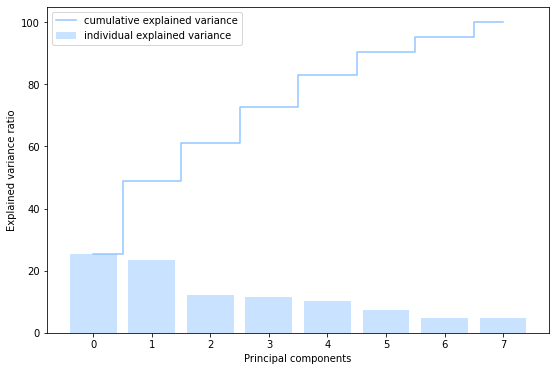

In [23]:
total = sum(auto_valores)
var_exp = [(i / total)*100 for i in sorted(auto_valores, reverse=True)]
acum_var_exp = np.cumsum(var_exp)
with plt.style.context('seaborn-pastel'):
    fig = plt.figure(figsize=(9, 6))
    plt.bar(range(df.shape[1]-1), var_exp, alpha=0.5, align='center', label='individual explained variance')
    plt.step(range(df.shape[1]-1), acum_var_exp, where='mid', label='cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.legend(loc='best')
    plt.show()

<p>Elijo la variable a eliminar DiabetesPedigreeFunction porque en la matriz es el que menos valores que se acercan a 1 en la tabla entre las variables.</p>

In [24]:
# sacar diabetespedigreefunction del dataframe
df_new = df.drop(['DiabetesPedigreeFunction'], axis=1)



<h1>5)Clustering:</h1>

<p>Utilizando el algoritmo k-means realize agrupamientos adecuados entre todos los pares de las variables predictoras.¿De a cuantos grupos agrupará?</p>

In [25]:
i=3
# generar 3 combinaciones 
comb = [[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]
var1 = comb[i][0]
var2 = comb[i][1]
fields =df_new.columns.to_list()
print('variables a analizar: ', fields[var1], fields[var2])
x = df.iloc[:, [var1,var2]].values

variables a analizar:  Glucose BloodPressure


In [26]:
df_new.plot(kind='scatter', x=fields[var1], y=fields[var2])
plt.show()

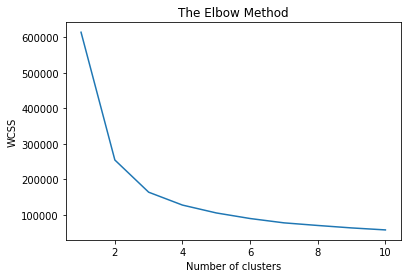

In [27]:
# the elbow curve
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


<p>utilizo 3 clusters para separarlos, ya que en el grafico es el punto que llega su tangente a 45%.</p>

In [28]:
# CLUSTERING RELATED WITH THE RESULTS OF THE ELBOW CURVE
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=768, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)
fig = plt.figure(figsize=(9, 6))
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s=100, c='red', label='Cluster 1')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s=100, c='blue', label='Cluster 2')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s=100, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label='Centroids')
plt.title('Clustering del Dataset Diabetes')
plt.legend(loc='upper right')
plt.show()



<h1>6)Data Mining:</h1>

    -Separar los datos en x_train, x_test, y_train, y_test.
    -Genere al menos un par de modelos predictores
    -Matriz de confusión para cada modelo predictor

In [29]:
# normalizar los datos
# df3 = df3.drop(['SkinThickness'], axis=1)
# a = df3.values
# min_max_scaler = preprocessing.MinMaxScaler()
# x_scaled = min_max_scaler.fit_transform(a)
# df3 = pd.DataFrame(x_scaled, columns=df3.columns)
# print(df3.describe())
X = np.array(df_new.drop(["Outcome"], 1))
y = np.array(df_new["Outcome"])
X_norm = preprocessing.scale(X)
normalizado = "NO"
balanceado = "NO"
if(normalizado == "NO"):
    X = X_norm
balancear = None
if(balanceado =="NO"):
    balancear = "balaced"
validation_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)


C:\Users\marin\AppData\Local\Temp\ipykernel_105488\3778393038.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(df_new.drop(["Outcome"], 1))


<h3>Regresion Logistica</h3>

In [30]:
model = linear_model.LogisticRegression(class_weight=balancear)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)
predictions = model.predict(X_test)
matriz_confusion = confusion_matrix(Y_test, predictions)
print("matriz Confusion:\n", matriz_confusion)
print('\nReporte de las Clasificaciones\n',classification_report(Y_test, predictions))



matriz Confusion:
 [[80  7]
 [18 23]]

Reporte de las Clasificaciones
               precision    recall  f1-score   support

           0       0.82      0.92      0.86        87
           1       0.77      0.56      0.65        41

    accuracy                           0.80       128
   macro avg       0.79      0.74      0.76       128
weighted avg       0.80      0.80      0.80       128



<h3>Red Neuronal </h3>

In [31]:
model = MLPClassifier()
params1 = {'activation': 'tanh', 'alpha': 0.1,'batch_size': 5, 'hidden_layer_sizes': 10, 'max_iter': 636}
params2 = {'activation': 'relu', 'alpha': 0.1,'batch_size': 20, 'hidden_layer_sizes': 20, 'max_iter': 636}
parms = params1
model.set_params(**parms)
model.fit(X_train,Y_train)
model.score(X_test,Y_test)
predictions = model.predict(X_test)
matriz_confusion = confusion_matrix(Y_test, predictions)
print("matriz Confusion:\n", matriz_confusion)
print("Reporte de las Clasificaciones \n",classification_report(Y_test, predictions))



matriz Confusion:
 [[78  9]
 [17 24]]
Reporte de las Clasificaciones 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86        87
           1       0.73      0.59      0.65        41

    accuracy                           0.80       128
   macro avg       0.77      0.74      0.75       128
weighted avg       0.79      0.80      0.79       128



***
<h1>7)Conclusiones</h1>

    Podiamos decir que la regresion Linear para este caso es mejor modelo. ya que la presicion en la parte positiva(0.77 vs 0.73) y el recall es mejor en ambos (0.56 vs 0.59). por lo que nos aportara mayor confianza a la hora de predecir resultados.
    Como aporte podria decir que se podria eliminar por ahi menos elementos del dataset para mejorar esta precision. (se borraron como 100 registros).

<h1>8) Mejoras para el final </h1>

In [32]:
# normalizar los datos
df3 = df3.drop(['SkinThickness'], axis=1)
a = df3.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(a)
df3 = pd.DataFrame(x_scaled, columns=df3.columns)
print(df3.describe())
X2 = np.array(df3.drop(["Outcome"], 1))
y2 = np.array(df3["Outcome"])
X_norm2 = preprocessing.scale(X2)
normalizado = "NO"
balanceado = "NO"
if(normalizado == "NO"):
    X2 = X_norm2
balancear = None
if(balanceado == "NO"):
    balancear = "balaced"
validation_size2 = 0.11
seed2 = 7
X_train2, X_test2, Y_train2, Y_test2 = model_selection.train_test_split(X2, y2, test_size=validation_size2, random_state=seed2)


       Pregnancies     Glucose  BloodPressure     Insulin         BMI  \
count   768.000000  768.000000     768.000000  768.000000  768.000000   
mean      0.226180    0.607510       0.566438    0.094326    0.476790   
std       0.198210    0.160666       0.158654    0.136222    0.117499   
min       0.000000    0.000000       0.000000    0.000000    0.000000   
25%       0.058824    0.497487       0.508197    0.000000    0.406855   
50%       0.176471    0.587940       0.590164    0.036052    0.476900   
75%       0.352941    0.704774       0.655738    0.150414    0.545455   
max       1.000000    1.000000       1.000000    1.000000    1.000000   

       DiabetesPedigreeFunction         Age     Outcome  
count                768.000000  768.000000  768.000000  
mean                   0.168179    0.204015    0.348958  
std                    0.141473    0.196004    0.476951  
min                    0.000000    0.000000    0.000000  
25%                    0.070773    0.050000    0.000

C:\Users\marin\AppData\Local\Temp\ipykernel_105488\2509999196.py:8: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X2 = np.array(df3.drop(["Outcome"], 1))


In [33]:
model2 = linear_model.LogisticRegression(class_weight=balancear)
model2.fit(X_train2, Y_train2)
model2.score(X_test2, Y_test2)
predictions2 = model2.predict(X_test2)
matriz_confusion2 = confusion_matrix(Y_test2, predictions2)
print("matriz Confusion:\n", matriz_confusion2)
print('\nReporte de las Clasificaciones\n',
      classification_report(Y_test2, predictions2))


matriz Confusion:
 [[52  2]
 [ 9 22]]

Reporte de las Clasificaciones
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        54
         1.0       0.92      0.71      0.80        31

    accuracy                           0.87        85
   macro avg       0.88      0.84      0.85        85
weighted avg       0.88      0.87      0.87        85



In [34]:
model2 = MLPClassifier()
params12 = {'activation': 'tanh', 'alpha': 0.1,
           'batch_size': 5, 'hidden_layer_sizes': 10, 'max_iter': 636}
params22 = {'activation': 'relu', 'alpha': 0.1,
           'batch_size': 20, 'hidden_layer_sizes': 20, 'max_iter': 636}
parms2 = params12
model2.set_params(**parms2)
model2.fit(X_train2, Y_train2)
model2.score(X_test2, Y_test2)
predictions2 = model2.predict(X_test2)
matriz_confusion2 = confusion_matrix(Y_test2, predictions2)
print("matriz Confusion:\n", matriz_confusion2)
print("Reporte de las Clasificaciones \n",
      classification_report(Y_test2, predictions2))


matriz Confusion:
 [[52  2]
 [ 9 22]]
Reporte de las Clasificaciones 
               precision    recall  f1-score   support

         0.0       0.85      0.96      0.90        54
         1.0       0.92      0.71      0.80        31

    accuracy                           0.87        85
   macro avg       0.88      0.84      0.85        85
weighted avg       0.88      0.87      0.87        85



    Como podemos ver decidimos al final no borrar datos en la parte de data warling solo normalizarlos, tambien en vez de borrar la variable diabetes pedigree function, borramos SkinThickness, como tambien bajamos validation_size de 0.20 a 0.11. Todos estos cambios hicieron que se mejorara ampliamente nuestro modelo a una precision de 0.92 y y recall 0.71 en ambos casos (tanto en regresion logistica como en red neuronal) lo que supone casi un 0.15 de mejora en nuestro modelo. 